**<h1><center>Credit Card Default Classification</center></h1>**

Financial threats are displaying a trend about the credit risk of commercial banks as the incredible improvement in the financial industry has arisen. In this way, one of the biggest threats faces by commercial banks is the risk prediction of credit clients.

**Objective** : Develop machine learning models to predict the probability of credit default based on credit card owner's characteristics and payment history.

Dataset Feature Description:


- <u>ID</u>: ID of each client
- <u>LIMIT_BAL</u>: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- <u>SEX</u>: Gender (1=male, 2=female)
- <u>EDUCATION</u>: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- <u>MARRIAGE</u>: Marital status (1=married, 2=single, 3=others)
- <u>AGE</u>: Age in years
- <u>PAY_0</u>: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- <u>PAY_2</u>: Repayment status in August, 2005 (scale same as above)
- <u>PAY_3</u>: Repayment status in July, 2005 (scale same as above)
- <u>PAY_4</u>: Repayment status in June, 2005 (scale same as above)
- <u>PAY_5</u>: Repayment status in May, 2005 (scale same as above)
- <u>PAY_6</u>: Repayment status in April, 2005 (scale same as above)
- <u>BILL_AMT1</u>: Amount of bill statement in September, 2005 (NT dollar)
- <u>BILL_AMT2</u>: Amount of bill statement in August, 2005 (NT dollar)
- <u>BILL_AMT3</u>: Amount of bill statement in July, 2005 (NT dollar)
- <u>BILL_AMT4</u>: Amount of bill statement in June, 2005 (NT dollar)
- <u>BILL_AMT5</u>: Amount of bill statement in May, 2005 (NT dollar)
- <u>BILL_AMT6</u>: Amount of bill statement in April, 2005 (NT dollar)
- <u>PAY_AMT1</u>: Amount of previous payment in September, 2005 (NT dollar)
- <u>PAY_AMT2</u>: Amount of previous payment in August, 2005 (NT dollar)
- <u>PAY_AMT3</u>: Amount of previous payment in July, 2005 (NT dollar)
- <u>PAY_AMT4</u>: Amount of previous payment in June, 2005 (NT dollar)
- <u>PAY_AMT5</u>: Amount of previous payment in May, 2005 (NT dollar)
- <u>PAY_AMT6</u>: Amount of previous payment in April, 2005 (NT dollar)
- <u>default.payment.next.month: Default payment (1=yes, 0=no)




In [1]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#changing to current working directory
import os

project_folder = "drive//MyDrive//creditCardDefaultClassification"
os.chdir(project_folder)

os.getcwd()

'/content/drive/MyDrive/creditCardDefaultClassification'

In [3]:
# importing required libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [4]:
# Reading data file
data = pd.read_csv('.//dataFiles//UCI_Credit_Card.csv')

data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
print("Total {} columns and {} observation".format(data.shape[1],
                                                   data.shape[0]))

Total 25 columns and 30000 observation


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

<u>Observations</u>  :  

-  The dataset contains `int64` and `float64` datatype. 12 variable or features are `float64` datatype and remaining features are `int64` datatype and all features are belonging to `numerical datatype`.

-  Their are 23 columns which are independent features and default.payment.next.month is our target features. All variables are numerical variables.

In [7]:
data.iloc[:,0:12].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


<u>Observations</u>:
- As above describes the descriptive statistics of each feature. As count of each feature is `30000` that means their is no null values in each feature.
- `LIMIT_BAL` column covers 75% of data 2,40,000 and maximum amount is 10,00,000.
- `SEX` column 25% data have male customers and 75% of have female customers.
- `EDUCATION` column 25% data contains `Graduate school` and remaining data contains `University to unknown` values.
- `MARRIAGE` column 25% data contains `MARRIED` and remaining data contains `single and  others`.
- `AGE` column 25% data contains age within 28 and remaining data ranges from 28 to 79.
- From above description we can conclude that `PAY_0,PAY_2,PAY_3,PAY_4,PAY_5 and PAY_6` has 75% of data covers within `0`. And minimum value is `-2` and maximum value is `8`.

In [8]:
data.iloc[:,12:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
PAY_AMT2,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0
PAY_AMT3,30000.0,5225.681500,17606.961470,0.0,390.00,1800.0,4505.00,896040.0
PAY_AMT4,30000.0,4826.076867,15666.159744,0.0,296.00,1500.0,4013.25,621000.0


<u>Observations</u>
- `BILL_AMT1` column contains 25% data within 3558 amount and remaining data ranges from 3600 to 964511. And `minimum value is -165580 and maximum value is 964511`.The mean value is 51223 and median is 22381 their might be outliers present.
- `BILL_AMT2` column contains 25% data within 2984 amount and remaining data ranges from 3000 to 983931. And `minimum value is -69777 and maximum value is 983931`.The mean value is 49179 and median is 21200 their might be outliers present.
- `BILL_AMT3` column contains 25% data within 2.666250e+03 amount and remaining data ranges from 2.666250e+03 to 1.664089e+06. And `minimum value is -1.572640e+05 and maximum value is 1.664089e+06`.The mean value is 49179 and median is 21200 their might be outliers present.
- `BILL_AMT4` column contains 25% data within 2326 amount and remaining data ranges from 2326 to 891586. And `minimum value is -170000 and maximum value is 1891586.The mean value is 43262 and median is 19052 their might be outliers present.
- `BILL_AMT5` column contains 25% data within 1763 amount and remaining data ranges from 1763 to 927171. And `minimum value is 927171 and maximum value is 927171`.The mean value is -40311 and median is 18104 their might be outliers present.
- `BILL_AMT6` column contains 25% data within 1256 amount and remaining data ranges from 1256 to 961664. And `minimum value is -339603 and maximum value is 961664.The mean value is 38871 and median is 17071 their might be outliers present.

- `default.payment.next.month` column covers 75% data with label as `0` and 25% data covers data with label as `1`. The dataset is imbalanced we need to treat this.

- `PAY_AMT1` column contains 25% data within 1000 amount and remaining data ranges from 1000 to 873552. And `minimum value is 0 and maximum value is 873552`.The mean value is 5663 and median is 2100 their might be outliers present.
- `PAY_AMT2` column contains 25% data within 8330 amount and remaining data ranges from 8330 to 1.684259e+06. And `minimum value is 0 and maximum value is 1.684259e+06`.The mean value is 5921 and median is 2009 their might be outliers present.
- `PAY_AMT3` column contains 25% data within 390 amount and remaining data ranges from 390 to 896040.. And `minimum value is 0 and maximum value is 896040.`.The mean value is 5225 and median is 1800 their might be outliers present.

- `PAY_AMT4` column contains 25% data within 296 amount and remaining data ranges from 296 to 621000. And `minimum value is 0 and maximum value is 621000.The mean value is 4826.076867 and median is 1500 their might be outliers present.
- `PAY_AMT5` column contains 25% data within 252 amount and remaining data ranges from 252 to 426529. And `minimum value is 0 and maximum value is 426529`.The mean value is 4799 and median is 1500 their might be outliers present.
- `PAY_AMT6` column contains 25% data within 117 amount and remaining data ranges from 117 to 528666. And `minimum value is 0 and maximum value is 528666.`The mean value is 5215 and median is 1500 their might be outliers present.

Here we will change column names for more understandable format. `PAY_sept` is more understandable than `PAY_0`.

In [9]:
rename_dict = {'PAY_0':'PAY_SEPT',
               'PAY_2':'PAY_AUG',
               'PAY_3':'PAY_JULY',
               'PAY_4':'PAY_JUNE',
               'PAY_5':'PAY_MAY',
               'PAY_6':'PAY_APRIL',
               'BILL_AMT1':'BILL_AMT_SEPT',
               'BILL_AMT2':'BILL_AMT_AUG',
               'BILL_AMT3':'BILL_AMT_JULY',
               'BILL_AMT4':'BILL_AMT_JUNE',
               'BILL_AMT5':'BILL_AMT_MAY',
               'BILL_AMT6':'BILL_AMT_APRIL',
               'PAY_AMT1':'PAY_AMT_SEPT',
               'PAY_AMT2':'PAY_AMT_AUG',
               'PAY_AMT3':'PAY_AMT_JULY',
               'PAY_AMT4':'PAY_AMT_JUNE',
               'PAY_AMT5':'PAY_AMT_MAY',
               'PAY_AMT6':'PAY_AMT_APRIL'}
data.rename(columns = rename_dict, inplace = True)

In [10]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**UNIVARIATE ANALYSIS**

We will use `Seaborn Countplot` is used for discrete data type. Data set contains `SEX, EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4 and default.payment.next.month` are discrete variable.

And we will use `seaborn histplot` is used for continuous data type. Data set contains `LIMIT_BAL, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6` are continuous variable.

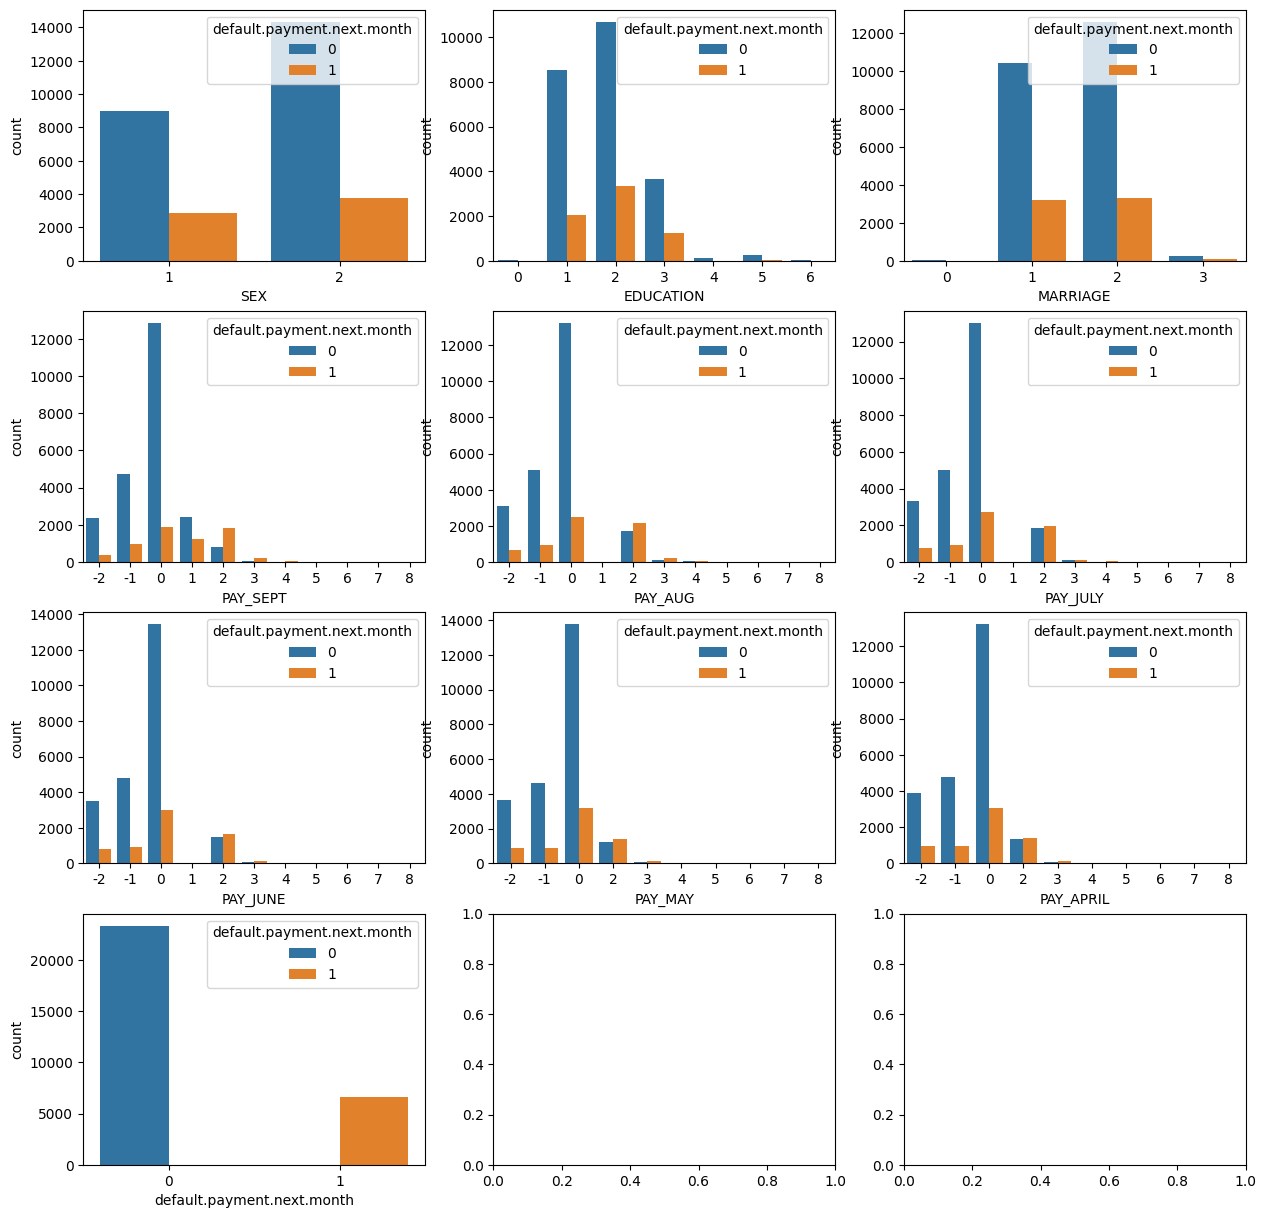

In [11]:
def plot_count_plot(column_names,dataframe):
    """
    This functions helps to plot countplot
    Parameters
    ----------
    column_names : list()
                   List of column names to plot countplot
    dataframe : Pandas.DataFrame()
                Pandas Dataframe
    Returns
    --------
    None
    """
    #Calculates no of rows required according to length of col names
    no_rows = (len(column_names)//3) + ((len(column_names)%3))
    fig, axes = plt.subplots(no_rows,3, figsize=(15,15))

    #plotting count plot
    row_value = -1
    for i, col in enumerate(column_names):
        column_value = i%3
        if column_value == 0:row_value += 1
        sns.countplot(data=dataframe, x=col,
                      hue = 'default.payment.next.month',
                      ax=axes[row_value][column_value])


discrete_col_names = ['SEX', 'EDUCATION','MARRIAGE',
                      'PAY_SEPT','PAY_AUG','PAY_JULY',
                      'PAY_JUNE','PAY_MAY','PAY_APRIL',
                      'default.payment.next.month']

plot_count_plot(discrete_col_names,data)

<u>Observations</u>
- From above plot `SEX` feature has more `female` customer than `male` customer.
- According to dataset decription `EDUCATION` feature should have only 6 values indicating these representation.(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown). But from above graph we have `0` has new value so we will replace `0,4,5,6 to 4`.
- According to dataset description `MARRIED` feature has only 3 values representing (1=married, 2=single, 3=others). But above graph has value `0` so we will replace into `0 to 3` value.
- From above graph we conclude that `PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,PAY_MAY and PAY_APRIL` columns most of data relies on value `0` value.
- And `Target variable that is default.payment.next.month` has imbalanced dataset. we need to make it balanced.

In [12]:
data['MARRIAGE'] = data['MARRIAGE'].map({0:3, 1:1, 2:2, 3:3})
data['MARRIAGE'].value_counts()

data['EDUCATION'] = data['EDUCATION'].map({0:4, 1:1, 2:2, 3:3, 4:4, 5:4, 6:4})
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

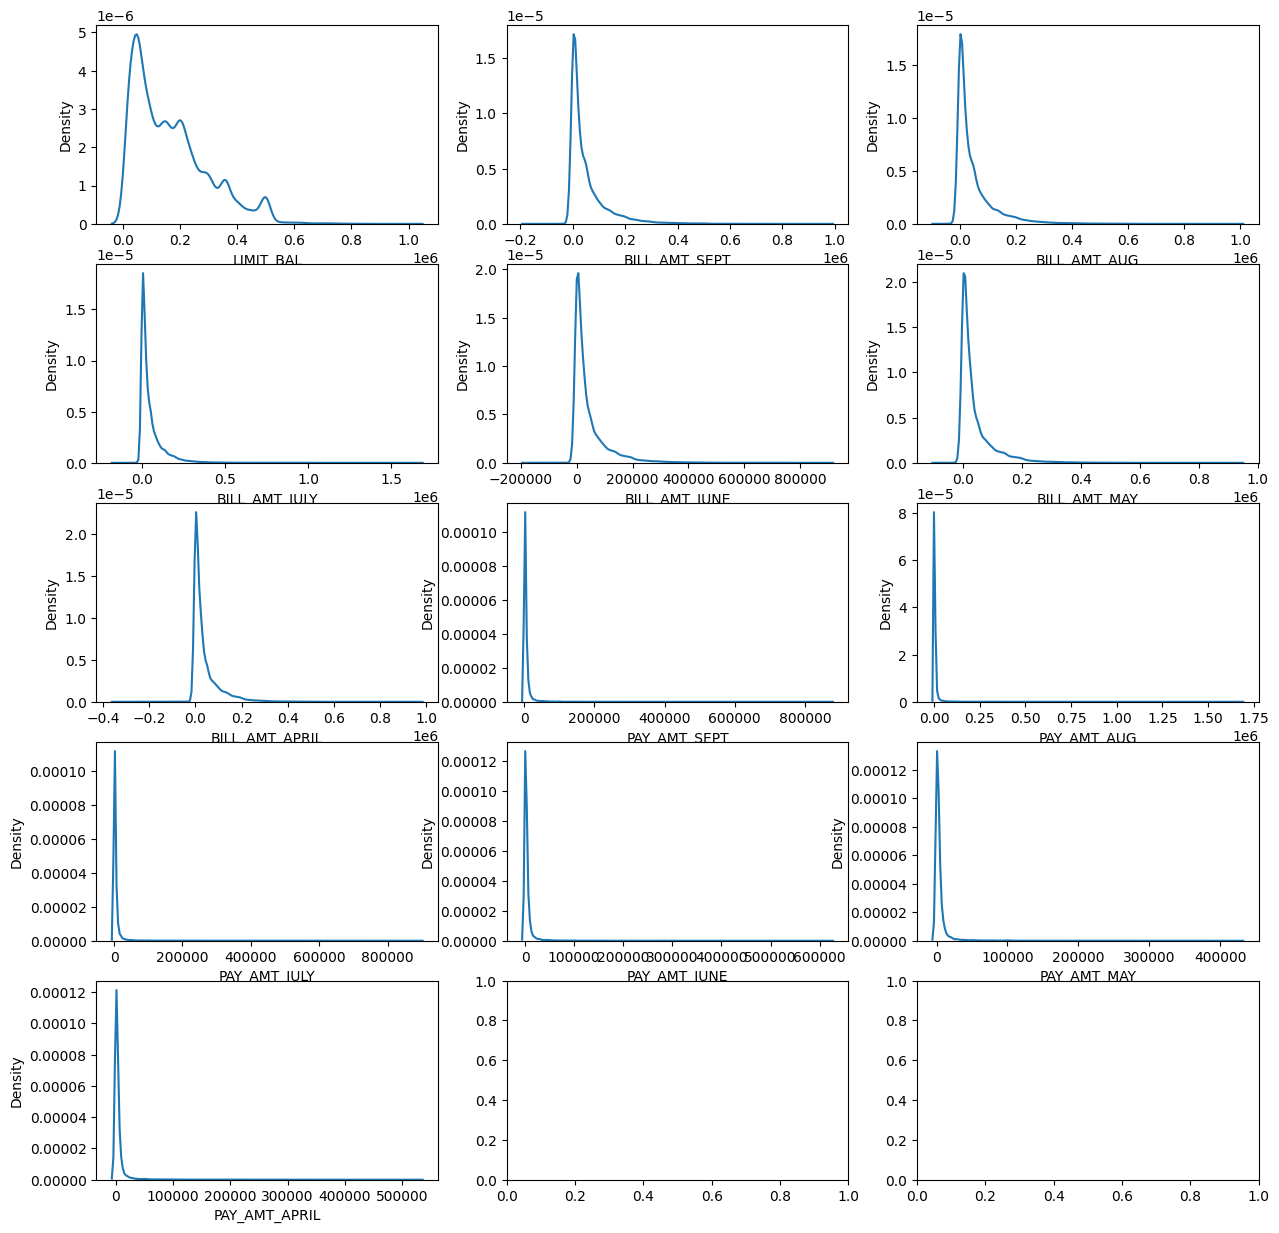

In [13]:
def plot_kde_plot(columns_names,dataframe):
    """
    This functions helps to plot relationhip between two bariables
    Parameters
    ----------
    columns_names : list()
                    List of column names to plot countplot
    dataframe : Pandas.DataFrame()
                Pandas Dataframe
    Returns
    --------
    None
    """
    no_rows = (len(columns_names)//3) + ((len(columns_names)%3))
    fig, axes = plt.subplots(no_rows,3, figsize=(15,15))

    row_value = -1
    for i, col in enumerate(columns_names):
        column_value = i%3
        if column_value == 0:row_value += 1
        sns.kdeplot(data=dataframe, x=col,
                      ax=axes[row_value][column_value])


columns_names_continuous = ['LIMIT_BAL', 'BILL_AMT_SEPT','BILL_AMT_AUG',
                            'BILL_AMT_JULY','BILL_AMT_JUNE','BILL_AMT_MAY',
                            'BILL_AMT_APRIL','PAY_AMT_SEPT','PAY_AMT_AUG',
                            'PAY_AMT_JULY','PAY_AMT_JUNE','PAY_AMT_MAY',
                            'PAY_AMT_APRIL']

plot_kde_plot(columns_names_continuous,data)

<u>Observations</u>
- From above plots all variables are not normally distributed.



Statistically we try to get whether these features are normally distributed or not.

<u>Skewness</u> : If the skewness is between -0.5 & 0.5, the data are nearly symmetrical. If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed. If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed.

<u>Kurtosis</u> : If kurtosis is `3` then it is normally distributed ,if kurtosis less than 3 means less peaked and if kurtosis is greater than 3 means very long and thick tails, which means there are more chances of outliers.

In [14]:
def normality_stats(columns, dataframe):
    """
    This function prints skewness and kurtosis.
    Parameters
    ------------
    columns:list()
            List of column names
    dataframe:pandas.dataframe
            Dataframe
    Returns
    --------
    None
    """
    for col in columns:
        print('{} skewness is {}'.format(col,dataframe[col].skew()))
        print('{} kurtosis is {}'.format(col,dataframe[col].kurt()))
        print('\n')

normality_stats(columns_names_continuous, data)




LIMIT_BAL skewness is 0.992866960519544
LIMIT_BAL kurtosis is 0.536262896398668


BILL_AMT_SEPT skewness is 2.6638610220232612
BILL_AMT_SEPT kurtosis is 9.806289341330837


BILL_AMT_AUG skewness is 2.7052208534082856
BILL_AMT_AUG kurtosis is 10.302945922629279


BILL_AMT_JULY skewness is 3.0878300462007244
BILL_AMT_JULY kurtosis is 19.783255144801103


BILL_AMT_JUNE skewness is 2.8219652908028117
BILL_AMT_JUNE kurtosis is 11.309324826831903


BILL_AMT_MAY skewness is 2.8763798667028633
BILL_AMT_MAY kurtosis is 12.30588128593057


BILL_AMT_APRIL skewness is 2.8466445756603678
BILL_AMT_APRIL kurtosis is 12.270705286713094


PAY_AMT_SEPT skewness is 14.66836433284317
PAY_AMT_SEPT kurtosis is 415.25474270738493


PAY_AMT_AUG skewness is 30.45381745016943
PAY_AMT_AUG kurtosis is 1641.6319110097434


PAY_AMT_JULY skewness is 17.216635435129238
PAY_AMT_JULY kurtosis is 564.3112294697712


PAY_AMT_JUNE skewness is 12.904984823542545
PAY_AMT_JUNE kurtosis is 277.3337677160758


PAY_AMT_MAY skew

<u>Observations</u>

As only `LIMIT_BAL` column slightly normally as skewness near to 0, and kurosis is less than 3 means less peaked.

And other columns are not normally distributed. And all discreate datatype columns has values ranges within value 10 and these continuous datatype columns has values ranges within 5000 to 1000000 so we need to scale them in order to have all varaiable in one range. As these columns are not normally distributed so we will scale using `min-max scaler`

**Checking Outliers**

`boxplot` helps to detect the outliers.

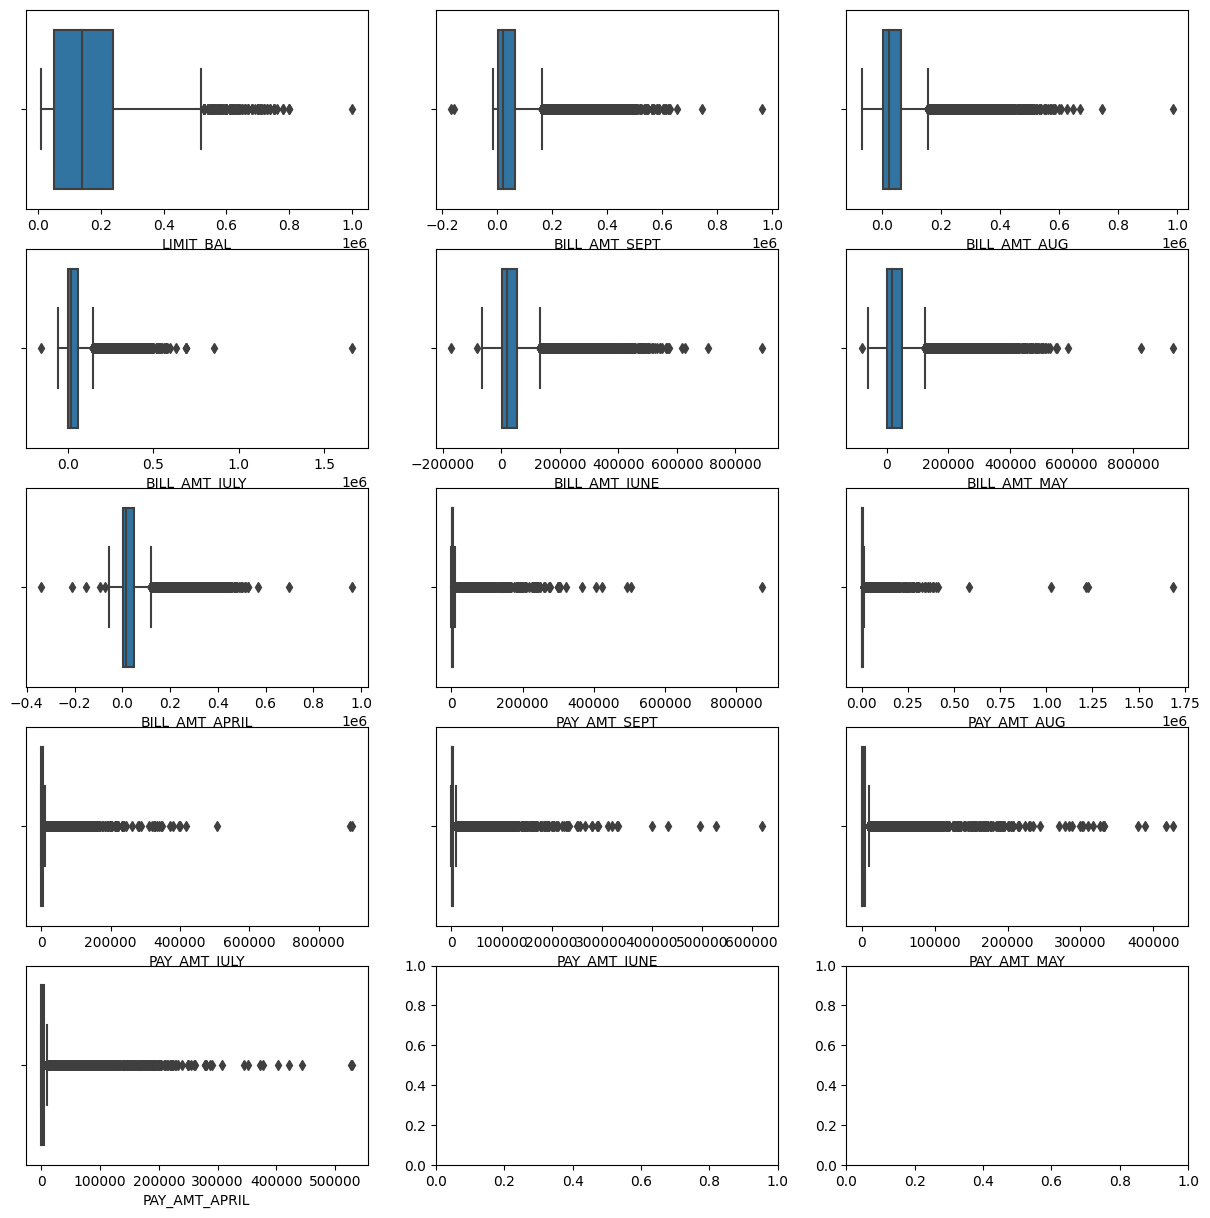

In [15]:
def plot_box_plot(columns_names,dataframe):
    """
    This functions helps to boxplot
    Parameters
    -----------
    columns_names: list()
                   List of column names
    dataframe: Pandas.dataframe
               Pandas dataframe
    Returns
    --------
    None
    """
    no_rows = (len(columns_names)//3) + ((len(columns_names)%3))
    fig, axes = plt.subplots(no_rows,3, figsize=(15,15))

    row_value = -1
    for i, col in enumerate(columns_names):
        column_value = i%3
        if column_value == 0:row_value += 1
        sns.boxplot(data=dataframe, x=col,
                      ax=axes[row_value][column_value])


plot_box_plot(columns_names_continuous,data)

<u>Observations</u>
- `LIMIT_BAL`feature has outliers which is greater than 5,50,000.

- `BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL` feature has outlier which is greater than 3,00,000 values.

- `PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,
PAY_AMT_APRIL` feature has outliers which is greater than 1,00,000 values.

We go for some statistial method to check for which starting value has outliers we will use `interquartile range` for that.

In [16]:
def return_outliers_index(outliers_columns, dataframe):
    """
    This function returns index of outliers present.
    Parameters
    -----------
    outliers_columns: List()
                      List of outlier columns
    dataframe: pandas.dataframe
               pandas dataframe
    Returns
    --------
    list_index : dict()
              This variable will contain key as columns names and values will
              be again dict().
    """
    list_index = {}
    target = 'default.payment.next.month'

    for col in outliers_columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)

        iqr = q3 - q1

        minimum = q1 - 1.5 * iqr
        maximum = q3 + 1.5 * iqr

        default_index = data.loc[((data[col]>maximum)|(data[col]<minimum))&(data[target]==1),:].index
        genuine_index = data.loc[((data[col]>maximum)|(data[col]<minimum))&(data[target]==0),:].index

        list_index[col] = {'default':default_index,
                           'genuine':genuine_index}

    return list_index



As from above results deleting observation which has outliers is not good idea has we have less observation to train the model so we will treat.

In the dataset some of the rows has `0` values so using `natural log` will leads to infinite values, so we will replace using `median`.

In [17]:
list_index = return_outliers_index(columns_names_continuous, data)

for col_name, index_details in list_index.items():
    data.loc[index_details['default'],col_name] = data.loc[data['default.payment.next.month']==1,col_name].median()
    data.loc[index_details['genuine'],col_name] = data.loc[data['default.payment.next.month']==0,col_name].median()

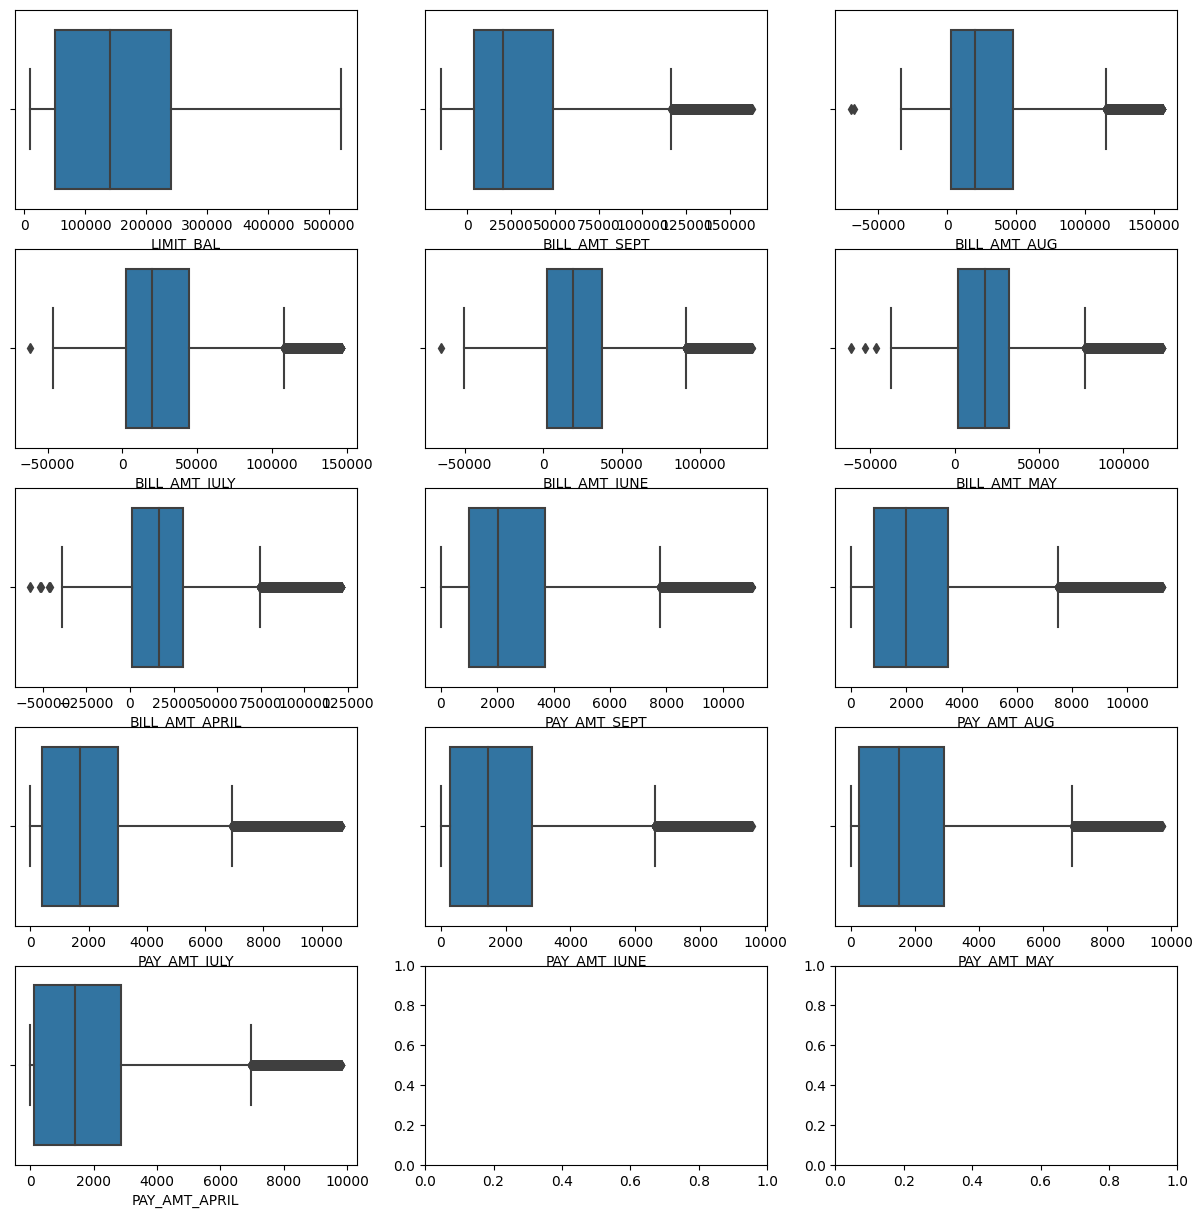

In [18]:
plot_box_plot(columns_names_continuous,data)

If we compare two plots of before imputing median and after imputing the median the outliers are reduced.

Droping `ID` as it is not required for model training.

In [19]:
data.drop('ID', axis=1,inplace=True)

As every variables are numerical data type so no need to perform feature encoding.

**BI-VARIATE ANALYSIS**

Here we are using data visualization library seaborn `bar graph` to plot between two variables(having discrete values).

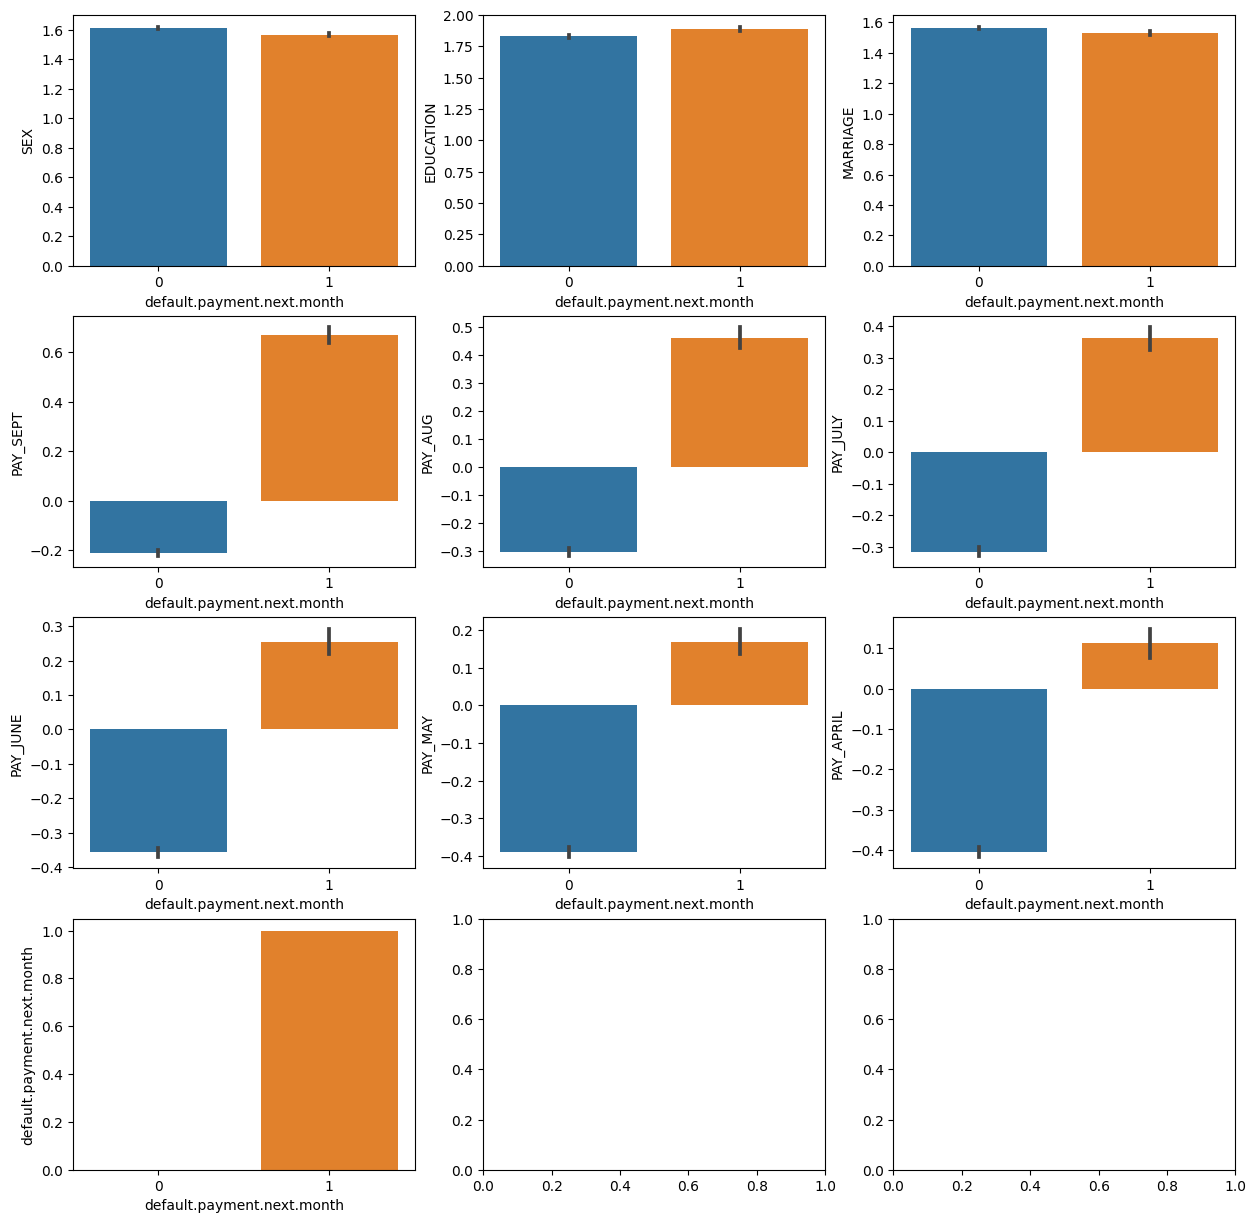

In [20]:
def plot_pair_plot(column_names,dataframe):
    """
    This functions helps to plot bar graph between two variables
    Parameters
    -----------
    column_names: List()
                  List of columns with discrete values
    dataframe: pandas.dataframe
               pandas dataframe
    Returns
    --------
    None
    """
    no_rows = (len(column_names)//3) + (len(column_names)%3)
    fig, axes = plt.subplots(no_rows,3, figsize=(15,15))

    row_value = -1
    for i, col in enumerate(column_names):
        column_value = i%3
        if column_value == 0:row_value += 1
        sns.barplot(data=data, x="default.payment.next.month",
                    y=col,
                    ax=axes[row_value][column_value])

plot_pair_plot(discrete_col_names,data)

<u>Observations</u>
- As we can see that `SEX, MARRIAGE AND EDUCATION` does not giving importance to the target variable. So we will try to drop these three columns and do trail and error method.
- And above features `PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,PAY_MAY and PAY_APRIL` genuine customer that is `default.payment.next.month` has values less than `0` that means the customer might be paid on time or earlier and default customer paid on time or delayed few months for payment..

In [22]:
data.groupby('default.payment.next.month')['EDUCATION'].describe()


,count,mean,std,min,25%,50%,75%,max
default.payment.next.month,,,,,,,,
0,23364.0,1.828839,0.754065,1.0,1.0,2.0,2.0,4.0
1,6636.0,1.889542,0.707803,1.0,1.0,2.0,2.0,4.0


In [23]:
data.groupby('default.payment.next.month')['SEX'].describe()

,count,mean,std,min,25%,50%,75%,max
default.payment.next.month,,,,,,,,
0,23364.0,1.614150,0.486806,1.0,1.0,2.0,2.0,2.0
1,6636.0,1.567058,0.495520,1.0,1.0,2.0,2.0,2.0


In [24]:
data.groupby('default.payment.next.month')['MARRIAGE'].describe()

,count,mean,std,min,25%,50%,75%,max
default.payment.next.month,,,,,,,,
0,23364.0,1.564929,0.520047,1.0,1.0,2.0,2.0,3.0
1,6636.0,1.530289,0.525307,1.0,1.0,2.0,2.0,3.0


<u>Observations</u>

- As above code if we observe `Education` grouped by `tagret variable` then the 25%, 50%,75% and max and min are same for both classes. So we consider this variable is less important to target variable and we will drop it.
- As above code if we observe `SEX` grouped by `tagret variable` then the 25%, 50%,75% and max and min are same for both classes. So we consider this variable is less important to target variable and we will drop it.
- As above code if we observe `MARRIAGE` grouped by `tagret variable` then the 25%, 50%,75% and max and min are same for both classes. So we consider this variable is less important to target variable and we will drop it.

In [25]:
data.drop(['SEX', 'MARRIAGE','EDUCATION'], axis=1,inplace=True)

<Axes: >

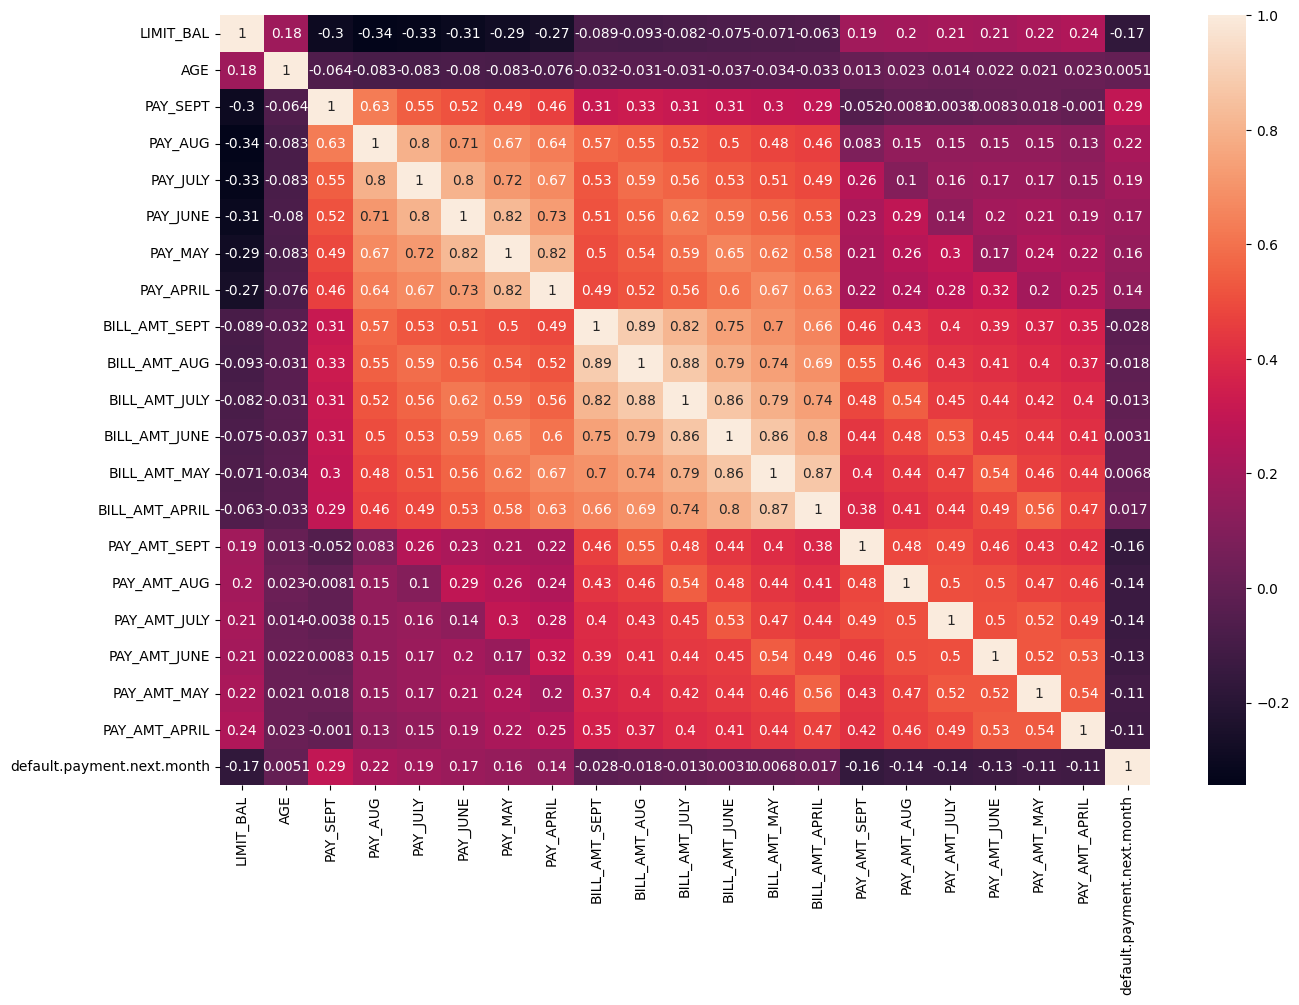

In [28]:
#correlation Matrix
correlation_matrix = data.corr(method='spearman')
fig,axes = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True)

As from above plots `BILL_AMT_SEPT` has highly correlated with `BILL_AMT_AUG, AND BILL_AMT_JULY`. `BILL_AMT_SEPT,BILL_AMT_AUG and BILL_AMT_JULY ` compared with target `BILL_AMT_AUG AND BILL_AMT_JULY` is less correlation so we are droping these two columns.

In [31]:
data.drop(['BILL_AMT_AUG','BILL_AMT_JULY'],axis=1, inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   AGE                         30000 non-null  int64  
 2   PAY_SEPT                    30000 non-null  int64  
 3   PAY_AUG                     30000 non-null  int64  
 4   PAY_JULY                    30000 non-null  int64  
 5   PAY_JUNE                    30000 non-null  int64  
 6   PAY_MAY                     30000 non-null  int64  
 7   PAY_APRIL                   30000 non-null  int64  
 8   BILL_AMT_SEPT               30000 non-null  float64
 9   BILL_AMT_JUNE               30000 non-null  float64
 10  BILL_AMT_MAY                30000 non-null  float64
 11  BILL_AMT_APRIL              30000 non-null  float64
 12  PAY_AMT_SEPT                30000 non-null  float64
 13  PAY_AMT_AUG                 300


**Feature Scaling**

Some variables range is too high compared to other variables. So we need to do scaling so that all variables are in same range.

If the variables are not normally distributed then we go for `normalization or min-max scaling` and if variables are normally distributed then we go for `standardation`.

In [33]:
def feature_scaling(colum_names, dataframe):
    """
    This function helps to scale feature into range of 0 to 1
    """
    for column in colum_names:
        minimum = dataframe[column].min()
        maximum = dataframe[column].max()
        dataframe[column] = (dataframe[column]-minimum)/(maximum-minimum)
    return dataframe

columns_need_to_scale = ['LIMIT_BAL', 'BILL_AMT_SEPT','BILL_AMT_JUNE',
                         'BILL_AMT_MAY','BILL_AMT_APRIL','PAY_AMT_SEPT',
                         'PAY_AMT_AUG','PAY_AMT_JULY','PAY_AMT_JUNE',
                         'PAY_AMT_MAY','PAY_AMT_APRIL']

data = feature_scaling(columns_need_to_scale, data)

In [34]:
data.head()

,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,PAY_MAY,PAY_APRIL,BILL_AMT_SEPT,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,default.payment.next.month
0,0.019608,24,2,2,-1,-1,-2,-2,0.108224,0.329258,0.333178,0.320342,0.000000,0.061250,0.000000,0.000000,0.000000,0.000000,1
1,0.215686,26,-1,2,0,0,0,2,0.101293,0.345789,0.351934,0.338650,0.000000,0.088897,0.093694,0.104341,0.000000,0.203728,1
2,0.156863,34,0,0,0,0,0,0,0.250822,0.401665,0.414328,0.407636,0.137837,0.133345,0.093694,0.104341,0.103093,0.509321,0
3,0.078431,37,0,0,0,0,0,0,0.350769,0.472315,0.490391,0.486223,0.181604,0.179483,0.112433,0.114775,0.110206,0.101864,0
4,0.078431,57,-1,0,-1,0,0,0,0.134710,0.435057,0.437118,0.427746,0.181604,0.199796,0.936944,0.939065,0.071031,0.069166,0


In [35]:
normality_stats(columns_need_to_scale, data)


LIMIT_BAL skewness is 0.8874904599355606
LIMIT_BAL kurtosis is 0.048434397414756525


BILL_AMT_SEPT skewness is 1.4470130017160487
BILL_AMT_SEPT kurtosis is 1.40067328378414


BILL_AMT_JUNE skewness is 1.4936023061206285
BILL_AMT_JUNE kurtosis is 1.5927867676098093


BILL_AMT_MAY skewness is 1.516431805782244
BILL_AMT_MAY kurtosis is 1.686624479464506


BILL_AMT_APRIL skewness is 1.5360678502853107
BILL_AMT_APRIL kurtosis is 1.7326663460877705


PAY_AMT_SEPT skewness is 1.2565095984671706
PAY_AMT_SEPT kurtosis is 1.1340265895343218


PAY_AMT_AUG skewness is 1.3461974327873136
PAY_AMT_AUG kurtosis is 1.4249261078605717


PAY_AMT_JULY skewness is 1.4603827520606092
PAY_AMT_JULY kurtosis is 1.761345400458684


PAY_AMT_JUNE skewness is 1.4026410349215117
PAY_AMT_JUNE kurtosis is 1.5593999593500576


PAY_AMT_MAY skewness is 1.3865420551266137
PAY_AMT_MAY kurtosis is 1.512747914304002


PAY_AMT_APRIL skewness is 1.411392331269688
PAY_AMT_APRIL kurtosis is 1.6219528527339242




As above we can see the results that after applying min-max scaler all variables are slightly converted to normal distribution.

**Treating Imbalanced Dataset**

As dataset has unequal distribution of target class, if we train the  model on this dataset the model will perform poor on minority class. We can make this dataset has balance by oversampling minority class that can be achieved by `SMOTE(Synthetic Minority Oversampling Technique).

In [36]:
from imblearn.over_sampling import SMOTE

# Resample the minority class.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
# X is feature and y is target
X = data.drop(['default.payment.next.month'], axis = 1)
y = data['default.payment.next.month']

oversampled_trainX, oversampled_trainY = sm.fit_resample(X, y)

oversampled_train_processed = pd.concat([pd.DataFrame(oversampled_trainY),
                               pd.DataFrame(oversampled_trainX)], axis=1)

In [37]:
oversampled_train_processed.to_csv('.//dataFiles//preprocessed_dataset.csv',
                                   index=False)